In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('Beta_with_cap.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
pd.set_option('display.max_rows',5000)

In [5]:
df=df.drop(['E(Ri)','minus'],axis=1)

In [6]:
df['r']=df['Ri'].shift(-1)
df=df.dropna()
df

CUR_MKT_CAP         Ticker        date      Beta        Ri         r
0        11775.3566  ABB IS Equity  2002-07-03 -0.039839  2.736180  0.575850
1        11843.1630  ABB IS Equity  2002-07-04 -0.038681  0.575850  0.984076
2        11959.7085  ABB IS Equity  2002-07-05 -0.039663  0.984076 -1.009922
3        11838.9249  ABB IS Equity  2002-07-08 -0.042511 -1.009922 -1.342402
4        11679.9977  ABB IS Equity  2002-07-09 -0.050111 -1.342402 -2.304064
...             ...            ...         ...       ...       ...       ...
203228  281469.6120    Z IS Equity  2019-11-29 -0.447118 -5.771704 -0.085310
203229  281229.4912    Z IS Equity  2019-12-02 -0.411990 -0.085310 -4.405738
203230  268839.2575    Z IS Equity  2019-12-03 -0.450626 -4.405738  0.518042
203231  270231.9582    Z IS Equity  2019-12-04 -0.448763  0.518042  6.646526
203232  288192.9947    Z IS Equity  2019-12-05 -0.439833  6.646526 -4.115981

[203233 rows x 6 columns]

In [7]:
df=df.dropna().reset_index(drop=True)


In [8]:
df=df.rename(columns={"CUR_MKT_CAP": "m"})
df['num']=df.apply(lambda row: row.m*row.Ri,axis=1)
df

m         Ticker        date      Beta        Ri         r  \
0        11775.3566  ABB IS Equity  2002-07-03 -0.039839  2.736180  0.575850   
1        11843.1630  ABB IS Equity  2002-07-04 -0.038681  0.575850  0.984076   
2        11959.7085  ABB IS Equity  2002-07-05 -0.039663  0.984076 -1.009922   
3        11838.9249  ABB IS Equity  2002-07-08 -0.042511 -1.009922 -1.342402   
4        11679.9977  ABB IS Equity  2002-07-09 -0.050111 -1.342402 -2.304064   
...             ...            ...         ...       ...       ...       ...   
203228  281469.6120    Z IS Equity  2019-11-29 -0.447118 -5.771704 -0.085310   
203229  281229.4912    Z IS Equity  2019-12-02 -0.411990 -0.085310 -4.405738   
203230  268839.2575    Z IS Equity  2019-12-03 -0.450626 -4.405738  0.518042   
203231  270231.9582    Z IS Equity  2019-12-04 -0.448763  0.518042  6.646526   
203232  288192.9947    Z IS Equity  2019-12-05 -0.439833  6.646526 -4.115981   

                 num  
0       3.221950e+04  
1       6.819889e+03  
2       1.176926e+04  
3      -1.195639e+04  
4      -1.567925e+04  
...              ...  
203228 -1.624559e+06  
203229 -2.399160e+04  
203230 -1.184435e+06  
203231  1.399915e+05  
203232  1.915482e+06  

[203233 rows x 7 columns]

In [9]:
len(df)

203233

In [10]:
df=df.sort_values('date')

In [11]:
gk=df.groupby('date')

In [12]:
l=df['date'].unique()
len(l)

4235

In [91]:
d=gk.get_group(l[0])



In [87]:
i=d['Beta'].median()
d[d['Beta']<i]['Ticker'].tolist()


['ABB IS Equity',
 'ACC IS Equity',
 'DRRD IS Equity',
 'GLXO IS Equity',
 'GRASIM IS Equity',
 'HCBA IS Equity',
 'HCLI IS Equity',
 'HDFCB IS Equity',
 'HMCL IS Equity',
 'HNDL IS Equity',
 'HUVR IS Equity',
 'INFO IS Equity',
 'ITC IS Equity',
 'MTNL IS Equity',
 'NCRL IS Equity',
 'NEST IS Equity',
 'NIIT IS Equity',
 'NIPCL IS Equity',
 'RBXY IS Equity',
 'RELI IS Equity',
 'SBIN IS Equity',
 'SCS IS Equity',
 'Z IS Equity']

In [46]:
lom=d['m'].sum()
shom=d['m'].sum()
lo=d[d['Beta']<=i]['num'].sum()/lom
sho=d[d['Beta']>i]['num'].sum()/shom
(lo-sho)*len(d)

13.933429569341698

In [32]:
d.head(5000)

Beta        Ri            Ticker        date
0  -0.317009  4.072161   NDEIL IS Equity  2002-07-03
1  -0.191168 -0.332858    HMCL IS Equity  2002-07-03
2  -0.176538  1.117318    NIIT IS Equity  2002-07-03
3  -0.176229 -0.091194    RBXY IS Equity  2002-07-03
4  -0.158768 -2.491803     ITC IS Equity  2002-07-03
5  -0.139990 -0.928064    RELI IS Equity  2002-07-03
6  -0.127130  3.537736    INFO IS Equity  2002-07-03
7  -0.060429 -0.098393    HNDL IS Equity  2002-07-03
8  -0.056660  0.663193    HCLI IS Equity  2002-07-03
9  -0.039984 -2.350966    NCRL IS Equity  2002-07-03
10 -0.039839  2.736180     ABB IS Equity  2002-07-03
11 -0.034093 -0.374065     ACC IS Equity  2002-07-03
12 -0.031196  1.009891    HUVR IS Equity  2002-07-03
13 -0.026513 -0.322077    NEST IS Equity  2002-07-03
14 -0.025741  2.311196    MTNL IS Equity  2002-07-03
15 -0.019694  0.056902    DRRD IS Equity  2002-07-03
16 -0.017327  0.095283   HDFCB IS Equity  2002-07-03
17 -0.009442 -1.008330    SBIN IS Equity  2002-07-03
18 -0.007837  0.143885  GRASIM IS Equity  2002-07-03
19 -0.005580 -0.065789   NIPCL IS Equity  2002-07-03
20 -0.002662 -0.179462    HCBA IS Equity  2002-07-03
21 -0.002633  0.908644       Z IS Equity  2002-07-03
22 -0.001514  0.383632    GLXO IS Equity  2002-07-03
23 -0.000458 -1.538082     SCS IS Equity  2002-07-03
24  0.003400  0.608305   CIPLA IS Equity  2002-07-03
25  0.006071 -0.246711    BHEL IS Equity  2002-07-03
26  0.007724  0.456848      PG IS Equity  2002-07-03
27  0.009258  0.385528     RIL IS Equity  2002-07-03
28  0.009942 -0.664894    TTCH IS Equity  2002-07-03
29  0.015320 -1.124297      LT IS Equity  2002-07-03
30  0.023408 -0.898876     OBC IS Equity  2002-07-03
31  0.032123  0.209205   NRILP IS Equity  2002-07-03
32  0.038792  0.932504    APNT IS Equity  2002-07-03
33  0.042197  0.213675      IH IS Equity  2002-07-03
34  0.063894  0.348028   CSTRL IS Equity  2002-07-03
35  0.067042  0.042427     NRC IS Equity  2002-07-03
36  0.067741 -3.593189    HDFC IS Equity  2002-07-03
37  0.081626  0.071705    CLGT IS Equity  2002-07-03
38  0.082261  0.407164     SKB IS Equity  2002-07-03
39  0.103225  0.057893    BRIT IS Equity  2002-07-03
40  0.108770 -1.451327    ACEM IS Equity  2002-07-03
41  0.116585  0.000000   DABUR IS Equity  2002-07-03
42  0.124760 -0.835020    TATA IS Equity  2002-07-03
43  0.132603 -3.500398    TPWR IS Equity  2002-07-03
44  0.142090 -2.180233    TGBL IS Equity  2002-07-03
45  0.174837  0.361961    TTMT IS Equity  2002-07-03
46  0.181469 -2.741604      MM IS Equity  2002-07-03
47  0.186039  3.782463    BJHI IS Equity  2002-07-03
48  0.212949  1.581921    HPCL IS Equity  2002-07-03

In [13]:
df_F=pd.DataFrame(columns=('date','Long','Short','Return'))

for i in l:
    df_t=gk.get_group(i).reset_index(drop=True)
    df_t=df_t.sort_values('Beta')
    J=df_t['Beta'].median()
    long=df_t[df_t['Beta']<=J]['Ticker'].tolist()
    short=df_t[df_t['Beta']>J]['Ticker'].tolist()
    lom=df_t['m'].sum()
    shom=df_t['m'].sum()
    lo=df_t[df_t['Beta']<=J]['num'].sum()/lom
    sho=df_t[df_t['Beta']>J]['num'].sum()/shom
    diff=(lo-sho)
    df_F=df_F.append([{'date':i,'Long':long,'Short':short,'Return':diff}])
    
df_F=df_F.reset_index(drop=True)

In [14]:
df_F[df_F['Return']<0]['Return'].value_counts().sum()

2059

In [67]:
len(df_F)

4235

In [17]:
df_F.to_csv('Portfolio_Value_Capital.csv')

In [15]:
df_F['log(1+R)']=np.log(1+df_F['Return']/100)
df_F

date                                               Long  \
0     2002-07-03  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
1     2002-07-04  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
2     2002-07-05  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
3     2002-07-08  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
4     2002-07-09  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
5     2002-07-10  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
6     2002-07-11  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
7     2002-07-12  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
8     2002-07-15  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
9     2002-07-16  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
10    2002-07-17  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
11    2002-07-18  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
12    2002-07-19  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
13    2002-07-22  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
14    2002-07-23  [HMCL IS Equity, RBXY IS Equity, NIIT IS Equit...   
15    2002-07-24  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
16    2002-07-25  [NIIT IS Equity, RBXY IS Equity, HMCL IS Equit...   
17    2002-07-26  [RBXY IS Equity, HMCL IS Equity, NIIT IS Equit...   
18    2002-07-29  [RBXY IS Equity, HMCL IS Equity, ITC IS Equity...   
19    2002-07-30  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
20    2002-07-31  [RBXY IS Equity, HMCL IS Equity, ITC IS Equity...   
21    2002-08-01  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
22    2002-08-02  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
23    2002-08-05  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
24    2002-08-06  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
25    2002-08-07  [HMCL IS Equity, ITC IS Equity, RBXY IS Equity...   
26    2002-08-08  [HMCL IS Equity, ITC IS Equity, RBXY IS Equity...   
27    2002-08-09  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
28    2002-08-12  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
29    2002-08-13  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
30    2002-08-14  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
31    2002-08-16  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
32    2002-08-19  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
33    2002-08-20  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
34    2002-08-21  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
35    2002-08-22  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
36    2002-08-23  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
37    2002-08-26  [ITC IS Equity, RBXY IS Equity, MTNL IS Equity...   
38    2002-08-27  [ITC IS Equity, RBXY IS Equity, HMCL IS Equity...   
39    2002-08-28  [ITC IS Equity, ACC IS Equity, RBXY IS Equity,...   
40    2002-08-29  [ITC IS Equity, ACC IS Equity, RBXY IS Equity,...   
41    2002-08-30  [ITC IS Equity, INFO IS Equity, RELI IS Equity...   
42    2002-09-02  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
43    2002-09-03  [ITC IS Equity, INFO IS Equity, NIPCL IS Equit...   
44    2002-09-04  [ITC IS Equity, INFO IS Equity, NIPCL IS Equit...   
45    2002-09-05  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
46    2002-09-06  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
47    2002-09-09  [ITC IS Equity, NIPCL IS Equity, INFO IS Equit...   
48    2002-09-11  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
49    2002-09-12  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
50    2002-09-13  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
51    2002-09-16  [NIPCL IS Equity, INFO IS Equity, ITC IS Equit...   
52    2002-09-17  [NIPCL IS Equity, INFO IS Equity, PG IS Equity...   
53    2002-09-18  [NIPCL IS Equity, INFO IS Equity, ITC IS Equit...   
54    2002-09-19  [NIPCL IS Equity, INFO IS Equity, PG IS Equity...   
55    2002-09-20  [NIPCL IS Equity, 

In [16]:
df_F['cum_sum'] = df_F['log(1+R)'].cumsum()
df_F['Cum Return %']=(np.exp(df_F['cum_sum'])-1)*100
df_F

date                                               Long  \
0     2002-07-03  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
1     2002-07-04  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
2     2002-07-05  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
3     2002-07-08  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
4     2002-07-09  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
5     2002-07-10  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
6     2002-07-11  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
7     2002-07-12  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
8     2002-07-15  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
9     2002-07-16  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
10    2002-07-17  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
11    2002-07-18  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
12    2002-07-19  [NIIT IS Equity, HMCL IS Equity, RBXY IS Equit...   
13    2002-07-22  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
14    2002-07-23  [HMCL IS Equity, RBXY IS Equity, NIIT IS Equit...   
15    2002-07-24  [HMCL IS Equity, NIIT IS Equity, RBXY IS Equit...   
16    2002-07-25  [NIIT IS Equity, RBXY IS Equity, HMCL IS Equit...   
17    2002-07-26  [RBXY IS Equity, HMCL IS Equity, NIIT IS Equit...   
18    2002-07-29  [RBXY IS Equity, HMCL IS Equity, ITC IS Equity...   
19    2002-07-30  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
20    2002-07-31  [RBXY IS Equity, HMCL IS Equity, ITC IS Equity...   
21    2002-08-01  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
22    2002-08-02  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
23    2002-08-05  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
24    2002-08-06  [HMCL IS Equity, RBXY IS Equity, ITC IS Equity...   
25    2002-08-07  [HMCL IS Equity, ITC IS Equity, RBXY IS Equity...   
26    2002-08-08  [HMCL IS Equity, ITC IS Equity, RBXY IS Equity...   
27    2002-08-09  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
28    2002-08-12  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
29    2002-08-13  [ITC IS Equity, HMCL IS Equity, RBXY IS Equity...   
30    2002-08-14  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
31    2002-08-16  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
32    2002-08-19  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
33    2002-08-20  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
34    2002-08-21  [ITC IS Equity, HMCL IS Equity, MTNL IS Equity...   
35    2002-08-22  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
36    2002-08-23  [ITC IS Equity, MTNL IS Equity, HMCL IS Equity...   
37    2002-08-26  [ITC IS Equity, RBXY IS Equity, MTNL IS Equity...   
38    2002-08-27  [ITC IS Equity, RBXY IS Equity, HMCL IS Equity...   
39    2002-08-28  [ITC IS Equity, ACC IS Equity, RBXY IS Equity,...   
40    2002-08-29  [ITC IS Equity, ACC IS Equity, RBXY IS Equity,...   
41    2002-08-30  [ITC IS Equity, INFO IS Equity, RELI IS Equity...   
42    2002-09-02  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
43    2002-09-03  [ITC IS Equity, INFO IS Equity, NIPCL IS Equit...   
44    2002-09-04  [ITC IS Equity, INFO IS Equity, NIPCL IS Equit...   
45    2002-09-05  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
46    2002-09-06  [ITC IS Equity, NIPCL IS Equity, RELI IS Equit...   
47    2002-09-09  [ITC IS Equity, NIPCL IS Equity, INFO IS Equit...   
48    2002-09-11  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
49    2002-09-12  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
50    2002-09-13  [NIPCL IS Equity, ITC IS Equity, INFO IS Equit...   
51    2002-09-16  [NIPCL IS Equity, INFO IS Equity, ITC IS Equit...   
52    2002-09-17  [NIPCL IS Equity, INFO IS Equity, PG IS Equity...   
53    2002-09-18  [NIPCL IS Equity, INFO IS Equity, ITC IS Equit...   
54    2002-09-19  [NIPCL IS Equity, INFO IS Equity, PG IS Equity...   
55    2002-09-20  [NIPCL IS Equity, 

In [ ]:
#lom=d[d['Beta']<=J]['m'].sum()
#    shom=d[d['Beta']>J]['m'].sum()
#    lo=d[d['Beta']<=J]['num'].sum()/lom
#    sho=d[d['Beta']>J]['num'].sum()/shom
#    diff=(lo-sho)*len(d)

In [18]:
gkg=df.groupby('Ticker')
lg=df['Ticker'].unique()

In [19]:
df_w=pd.DataFrame()
for i in lg:
    df_t=gkg.get_group(i).sort_values('date').reset_index(drop=True)
    df_t['log(1+r)']=np.log(1+df['r']/100)
    df_t['CumR']=df_t['log(1+r)'].cumsum()
    df_w=df_w.append(df_t).reset_index(drop=True)
df_w.head(5000)

m          Ticker        date      Beta         Ri  \
0     1.177536e+04   ABB IS Equity  2002-07-03 -0.039839   2.736180   
1     1.184316e+04   ABB IS Equity  2002-07-04 -0.038681   0.575850   
2     1.195971e+04   ABB IS Equity  2002-07-05 -0.039663   0.984076   
3     1.183892e+04   ABB IS Equity  2002-07-08 -0.042511  -1.009922   
4     1.168000e+04   ABB IS Equity  2002-07-09 -0.050111  -1.342402   
5     1.141089e+04   ABB IS Equity  2002-07-10 -0.050278  -2.304064   
6     1.118203e+04   ABB IS Equity  2002-07-11 -0.044480  -2.005571   
7     1.124984e+04   ABB IS Equity  2002-07-12 -0.052886   0.606405   
8     1.120958e+04   ABB IS Equity  2002-07-15 -0.049953  -0.357883   
9     1.110787e+04   ABB IS Equity  2002-07-16 -0.047339  -0.907372   
10    1.115237e+04   ABB IS Equity  2002-07-17 -0.047650   0.400610   
11    1.122441e+04   ABB IS Equity  2002-07-18 -0.046662   0.646019   
12    1.122441e+04   ABB IS Equity  2002-07-19 -0.043752   0.000000   
13    1.123925e+04   ABB IS Equity  2002-07-22 -0.045103   0.132150   
14    1.120746e+04   ABB IS Equity  2002-07-23 -0.039371  -0.282805   
15    1.119686e+04   ABB IS Equity  2002-07-24 -0.039284  -0.094536   
16    1.157193e+04   ABB IS Equity  2002-07-25 -0.052266   3.349735   
17    1.176052e+04   ABB IS Equity  2002-07-26 -0.053310   1.629738   
18    1.183469e+04   ABB IS Equity  2002-07-29 -0.057621   0.630631   
19    1.167364e+04   ABB IS Equity  2002-07-30 -0.054805  -1.360788   
20    1.173721e+04   ABB IS Equity  2002-07-31 -0.055660   0.544563   
21    1.167153e+04   ABB IS Equity  2002-08-01 -0.055089  -0.559668   
22    1.165245e+04   ABB IS Equity  2002-08-02 -0.057505  -0.163399   
23    1.187495e+04   ABB IS Equity  2002-08-05 -0.056608   1.909438   
24    1.189190e+04   ABB IS Equity  2002-08-06 -0.055030   0.142755   
25    1.194064e+04   ABB IS Equity  2002-08-07 -0.033864   0.409836   
26    1.199361e+04   ABB IS Equity  2002-08-08 -0.039385   0.443656   
27    1.208897e+04   ABB IS Equity  2002-08-09 -0.053669   0.795053   
28    1.224578e+04   ABB IS Equity  2002-08-12 -0.050353   1.297108   
29    1.209321e+04   ABB IS Equity  2002-08-13 -0.053402  -1.245890   
30    1.212711e+04   ABB IS Equity  2002-08-14 -0.059066   0.280357   
31    1.198090e+04   ABB IS Equity  2002-08-16 -0.067799  -1.205661   
32    1.199785e+04   ABB IS Equity  2002-08-19 -0.066765   0.141493   
33    1.204235e+04   ABB IS Equity  2002-08-20 -0.066641   0.370894   
34    1.206142e+04   ABB IS Equity  2002-08-21 -0.062234   0.158367   
35    1.207413e+04   ABB IS Equity  2002-08-22 -0.019445   0.105411   
36    1.195971e+04   ABB IS Equity  2002-08-23 -0.014995  -0.947701   
37    1.196818e+04   ABB IS Equity  2002-08-26 -0.057743   0.070872   
38    1.199361e+04   ABB IS Equity  2002-08-27 -0.061971   0.212465   
39    1.203811e+04   ABB IS Equity  2002-08-28 -0.060248   0.371025   
40    1.202964e+04   ABB IS Equity  2002-08-29 -0.074194  -0.070410   
41    1.198938e+04   ABB IS Equity  2002-08-30  0.101547  -0.334684   
42    1.187919e+04   ABB IS Equity  2002-09-02  0.102298  -0.919053   
43    1.203600e+04   ABB IS Equity  2002-09-03  0.115565   1.320014   
44    1.208473e+04   ABB IS Equity  2002-09-04  0.112047   0.404930   
45    1.190250e+04   ABB IS Equity  2002-09-05  0.095547  -1.507978   
46    1.208261e+04   ABB IS Equity  2002-09-06  0.102640   1.513263   
47    1.188978e+04   ABB IS Equity  2002-09-09  0.131986  -1.595931   
48    1.209533e+04   ABB IS Equity  2002-09-11  0.159778   1.728747   
49    1.191945e+04   ABB IS Equity  2002-09-12  0.133496  -1.454100   
50    1.209109e+04   ABB IS Equity  2002-09-13  0.136356   1.440000   
51    1.194911e+04   ABB IS Equity  2002-09-16  0.141602  -1.174203   
52    1.192793e+04   ABB IS Equity  2002-09-17  0.145690  -0.177336   
53    1.193640e+04   ABB IS Equity  2002-09-18  0.137495   0.071061   
54    1.187283e+04   ABB IS Equity  2002-09-19  0.145154  -0.532576   
55    1.186435e+04   ABB IS Equity  2002-

In [20]:
gk=df_w.groupby('date')
l=df_w['date'].unique()

In [21]:
gk.get_group(l[0])

m            Ticker        date      Beta        Ri  \
0        11775.3566     ABB IS Equity  2002-07-03 -0.039839  2.736180   
2068    125993.9307    SBIN IS Equity  2002-07-03 -0.009442 -1.008330   
6302     75106.0801    HDFC IS Equity  2002-07-03  0.067741 -3.593189   
10536    57031.4170   CIPLA IS Equity  2002-07-03  0.003400  0.608305   
14770    11349.5213    TGBL IS Equity  2002-07-03  0.142090 -2.180233   
15625    50891.0179    TTMT IS Equity  2002-07-03  0.174837  0.361961   
19856    46252.8972      LT IS Equity  2002-07-03  0.015320 -1.124297   
24066    53183.0916    HNDL IS Equity  2002-07-03 -0.060429 -0.098393   
28300    53462.4282    BJHI IS Equity  2002-07-03  0.186039  3.782463   
29886    30139.8768    RELI IS Equity  2002-07-03 -0.139990 -0.928064   
32691    18980.2433    CLGT IS Equity  2002-07-03  0.081626  0.071705   
33303    30718.0312    ACEM IS Equity  2002-07-03  0.108770 -1.451327   
37310    10794.5174    TTCH IS Equity  2002-07-03  0.009942 -0.664894   
38165    62781.5703    HMCL IS Equity  2002-07-03 -0.191168 -0.332858   
42399    12539.9341      MM IS Equity  2002-07-03  0.181469 -2.741604   
46633     8052.0190    NCRL IS Equity  2002-07-03 -0.039984 -2.350966   
46754    49234.6786    NEST IS Equity  2002-07-03 -0.026513 -0.322077   
47015    27334.5773     ACC IS Equity  2002-07-03 -0.034093 -0.374065   
50782     4720.7723    NIIT IS Equity  2002-07-03 -0.176538  1.117318   
51368     7362.1912      IH IS Equity  2002-07-03  0.042197  0.213675   
51980    17121.9188     SKB IS Equity  2002-07-03  0.082261  0.407164   
52592    72548.2802    DRRD IS Equity  2002-07-03 -0.019694  0.056902   
56344    53505.0342       Z IS Equity  2002-07-03 -0.002633  0.908644   
59121     9850.1471      PG IS Equity  2002-07-03  0.007724  0.456848   
59241     8491.3892     OBC IS Equity  2002-07-03  0.023408 -0.898876   
60342    25640.0680   CSTRL IS Equity  2002-07-03  0.063894  0.348028   
60540   124579.9245   NRILP IS Equity  2002-07-03  0.032123  0.209205   
60607     7999.7883    HCBA IS Equity  2002-07-03 -0.002662 -0.179462   
60805     3414.8303    HCLI IS Equity  2002-07-03 -0.056660  0.663193   
60925    96099.7792    HPCL IS Equity  2002-07-03  0.212949  1.581921   
62737   165659.5179     ITC IS Equity  2002-07-03 -0.158768 -2.491803   
66971   282627.8703     RIL IS Equity  2002-07-03  0.009258  0.385528   
71205    44521.0108    BHEL IS Equity  2002-07-03  0.006071 -0.246711   
74970   223084.7326    INFO IS Equity  2002-07-03 -0.127130  3.537736   
79205    14709.0537   DABUR IS Equity  2002-07-03  0.116585  0.000000   
80306    75305.7220     SCS IS Equity  2002-07-03 -0.000458 -1.538082   
81892    13923.0180    BRIT IS Equity  2002-07-03  0.103225  0.057893   
82504    24876.6966    TPWR IS Equity  2002-07-03  0.132603 -3.500398   
86271   427131.8445    HUVR IS Equity  2002-07-03 -0.031196  1.009891   
90505    94823.0640    MTNL IS Equity  2002-07-03 -0.025741  2.311196   
91850    59192.6137   HDFCB IS Equity  2002-07-03 -0.017327  0.095283   
96084    30761.8269  GRASIM IS Equity  2002-07-03 -0.007837  0.143885   
100078   26892.6911    GLXO IS Equity  2002-07-03 -0.001514  0.383632   
101664   21889.0104    APNT IS Equity  2002-07-03  0.038792  0.932504   
103461   37705.4526   NIPCL IS Equity  2002-07-03 -0.005580 -0.065789   
104563  101576.6111    RBXY IS Equity  2002-07-03 -0.176229 -0.091194   
107605   51911.0053    TATA IS Equity  2002-07-03  0.124760 -0.835020   

               r            num  log(1+r)      CumR  
0       0.575850   32219.500403  0.005742  0.005742  
2068    0.398583 -127043.419820  0.005742  0.005742  
6302    1.539459 -269870.308124  0.005742  0.005742  
10536   0.341746   34692.477942  0.005742  0.005742  
14770   2.823180  -24744.595858  0.005742  0.005742  
15625   1.672131   18420.572455  0.005742  0.005742  
19856  -0.410613  -52002.008095  0.005742  0.005742  
24066  -1.050558   -5232.839449  0.005742  0.005742  
28300   3.679484  202219.66

In [22]:
import math as m
l.sort()
df_W=pd.DataFrame(columns=('date','Long','Short','Return','Beta'))

for j in range(0,len(l)-4,5):
    i=l[j]
    df_t=gk.get_group(i).reset_index(drop=True).set_index('Ticker',drop=True)
    df_t5=gk.get_group(l[j+4]).reset_index(drop=True).set_index('Ticker',drop=True)
    #df_t=df_t.sort_values('Beta')
    J=df_t['Beta'].median()
    lob=df_t[df_t['Beta']<=J]['Beta'].sum()
    shob=df_t[df_t['Beta']<=J]['Beta'].sum()
    long=df_t[df_t['Beta']<=J].index.tolist()
    short=df_t[df_t['Beta']>J].index.tolist()
    x=df_t['m'].sum()
    lo=0
    cl=0
    for k in long:
        if k in (df_t5.index):
            term=df_t5.at[k,'CumR']-df_t.at[k,'CumR']
            lo=lo+(m.exp(term)-1)*df_t.at[k,'m']
            cl=cl+1
    sho=0
    cs=0
    for k in short:
        if k in (df_t5.index):
            term=df_t5.at[k,'CumR']-df_t.at[k,'CumR']
            sho=sho+(m.exp(term)-1)*df_t.at[k,'m']
            cs=cs+1
    #lo=df_t[df_t['Beta']<=J]['r'].sum()
    #sho=df_t[df_t['Beta']>J]['r'].sum()
    diffb=lob-shob
    
    diff=(lo-sho)/x
    df_W=df_W.append([{'date':i,'Long':long,'Short':short,'Return':diff*100,'Beta':diffb}]).reset_index(drop=True)


In [34]:
df_W.to_csv('Weekly_valuew.csv')

In [23]:
df_W['log(1+R)']=np.log(1+(df_W['Return']/100))
df_W['cum_sum'] = df_W['log(1+R)'].cumsum()
df_W['Cum Return %']=(np.exp(df_W['cum_sum'])-1)*100
df_W


date                                               Long  \
0    2002-07-03  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
1    2002-07-10  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
2    2002-07-17  [ABB IS Equity, CIPLA IS Equity, HNDL IS Equit...   
3    2002-07-24  [ABB IS Equity, CIPLA IS Equity, HNDL IS Equit...   
4    2002-07-31  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
5    2002-08-07  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
6    2002-08-14  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
7    2002-08-22  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
8    2002-08-29  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
9    2002-09-05  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
10   2002-09-13  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
11   2002-09-20  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
12   2002-09-27  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
13   2002-10-07  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
14   2002-10-14  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
15   2002-10-22  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
16   2002-10-29  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
17   2002-11-07  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
18   2002-11-14  [ABB IS Equity, SBIN IS Equity, HDFC IS Equity...   
19   2002-11-22  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
20   2002-11-29  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
21   2002-12-06  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
22   2002-12-13  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
23   2002-12-20  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
24   2002-12-30  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
25   2003-01-06  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
26   2003-01-13  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
27   2003-01-20  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
28   2003-01-27  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
29   2003-02-03  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
30   2003-02-10  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
31   2003-02-18  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
32   2003-02-25  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
33   2003-03-04  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
34   2003-03-11  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
35   2003-03-20  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
36   2003-03-27  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
37   2003-04-04  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
38   2003-04-16  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
39   2003-04-24  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
40   2003-05-02  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
41   2003-05-09  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
42   2003-05-20  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
43   2003-05-27  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
44   2003-06-03  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
45   2003-06-10  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
46   2003-06-17  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
47   2003-06-24  [ABB IS Equity, SBIN IS Equity, HDFC IS Equity...   
48   2003-07-02  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
49   2003-07-09  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
50   2003-07-16  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
51   2003-07-23  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
52   2003-07-30  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
53   2003-08-06  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
54   2003-08-13  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
55   2003-08-21  [ABB IS Equity, TGBL IS Equity, LT IS Equity, ...   
56   2003-08-28  [ABB

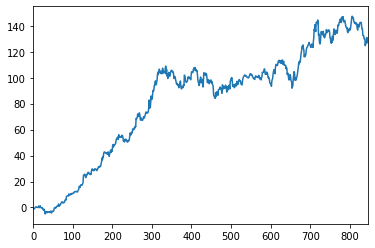

In [25]:
df_W['Cum Return %'].plot()

In [28]:
import math as m
l.sort()
df_M=pd.DataFrame(columns=('date','Long','Short','Return','Beta'))

for j in range(0,len(l)-20,21):
    i=l[j]
    df_t=gk.get_group(i).reset_index(drop=True).set_index('Ticker',drop=True)
    df_t5=gk.get_group(l[j+20]).reset_index(drop=True).set_index('Ticker',drop=True)
    #df_t=df_t.sort_values('Beta')
    J=df_t['Beta'].median()
    lob=df_t[df_t['Beta']<=J]['Beta'].sum()
    shob=df_t[df_t['Beta']<=J]['Beta'].sum()
    long=df_t[df_t['Beta']<=J].index.tolist()
    short=df_t[df_t['Beta']>J].index.tolist()
    lo=0
    cl=0
    for k in long:
        if k in (df_t5.index):
            term=df_t5.at[k,'CumR']-df_t.at[k,'CumR']
            lo=lo+(m.exp(term)-1)*df_t.at[k,'m']
            cl=cl+1
    sho=0
    cs=0
    for k in short:
        if k in (df_t5.index):
            term=df_t5.at[k,'CumR']-df_t.at[k,'CumR']
            sho=sho+(m.exp(term)-1)*df_t.at[k,'m']
            cs=cs+1
    #lo=df_t[df_t['Beta']<=J]['r'].sum()
    #sho=df_t[df_t['Beta']>J]['r'].sum()
    diffb=lob-shob
    x=df_t['m'].sum()
    diff=(lo-sho)/(x)
    df_M=df_M.append([{'date':i,'Long':long,'Short':short,'Return':diff*100,'Beta':diffb}]).reset_index(drop=True)
    


In [29]:
df_M['log(1+R)']=np.log(1+(df_M['Return']/100))
df_M['cum_sum'] = df_M['log(1+R)'].cumsum()
df_M['Cum Return %']=(np.exp(df_M['cum_sum'])-1)*100
df_M


date                                               Long  \
0    2002-07-03  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
1    2002-08-01  [ABB IS Equity, SBIN IS Equity, CIPLA IS Equit...   
2    2002-09-02  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
3    2002-10-03  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
4    2002-11-05  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
5    2002-12-06  [HDFC IS Equity, CIPLA IS Equity, HNDL IS Equi...   
6    2003-01-07  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
7    2003-02-05  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
8    2003-03-07  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
9    2003-04-10  [ABB IS Equity, HDFC IS Equity, CIPLA IS Equit...   
10   2003-05-20  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
11   2003-06-18  [ABB IS Equity, SBIN IS Equity, HDFC IS Equity...   
12   2003-07-18  [ABB IS Equity, HDFC IS Equity, TGBL IS Equity...   
13   2003-08-19  [ABB IS Equity, TGBL IS Equity, LT IS Equity, ...   
14   2003-09-17  [ABB IS Equity, SBIN IS Equity, HDFC IS Equity...   
15   2003-10-17  [ABB IS Equity, SBIN IS Equity, HNDL IS Equity...   
16   2003-11-17  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
17   2003-12-17  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
18   2004-01-16  [HDFC IS Equity, CIPLA IS Equity, TTMT IS Equi...   
19   2004-02-19  [SBIN IS Equity, HDFC IS Equity, CIPLA IS Equi...   
20   2004-03-22  [SBIN IS Equity, TTMT IS Equity, RELI IS Equit...   
21   2004-04-23  [SBIN IS Equity, TTMT IS Equity, LT IS Equity,...   
22   2004-05-26  [HDFC IS Equity, TTMT IS Equity, HNDL IS Equit...   
23   2004-06-24  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
24   2004-07-23  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
25   2004-08-24  [HDFC IS Equity, TTMT IS Equity, HNDL IS Equit...   
26   2004-09-22  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
27   2004-10-25  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
28   2004-11-25  [SBIN IS Equity, TGBL IS Equity, BJHI IS Equit...   
29   2004-12-27  [SBIN IS Equity, HDFC IS Equity, TGBL IS Equit...   
30   2005-01-27  [SBIN IS Equity, TTCH IS Equity, HMCL IS Equit...   
31   2005-02-25  [HDFC IS Equity, TTMT IS Equity, BJHI IS Equit...   
32   2005-03-30  [SBIN IS Equity, TGBL IS Equity, TTMT IS Equit...   
33   2005-05-03  [SBIN IS Equity, TGBL IS Equity, TTMT IS Equit...   
34   2005-06-02  [SBIN IS Equity, TTMT IS Equity, BJHI IS Equit...   
35   2005-07-01  [SBIN IS Equity, TTMT IS Equity, BJHI IS Equit...   
36   2005-08-03  [SBIN IS Equity, HDFC IS Equity, TGBL IS Equit...   
37   2005-09-02  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
38   2005-10-04  [HNDL IS Equity, TTCH IS Equity, MM IS Equity,...   
39   2005-11-08  [RELI IS Equity, TTCH IS Equity, ACC IS Equity...   
40   2005-12-08  [HNDL IS Equity, RELI IS Equity, TTCH IS Equit...   
41   2006-01-06  [LT IS Equity, RELI IS Equity, MM IS Equity, A...   
42   2006-02-08  [LT IS Equity, HNDL IS Equity, RELI IS Equity,...   
43   2006-03-10  [HNDL IS Equity, RELI IS Equity, ACEM IS Equit...   
44   2006-04-17  [HNDL IS Equity, RELI IS Equity, ACEM IS Equit...   
45   2006-05-17  [CIPLA IS Equity, TTMT IS Equity, HNDL IS Equi...   
46   2006-06-15  [HDFC IS Equity, HNDL IS Equity, BJHI IS Equit...   
47   2006-07-14  [SBIN IS Equity, HDFC IS Equity, HNDL IS Equit...   
48   2006-08-14  [SBIN IS Equity, HDFC IS Equity, HNDL IS Equit...   
49   2006-09-13  [SBIN IS Equity, HDFC IS Equity, HNDL IS Equit...   
50   2006-10-13  [SBIN IS Equity, HDFC IS Equity, BJHI IS Equit...   
51   2006-11-15  [SBIN IS Equity, HDFC IS Equity, HNDL IS Equit...   
52   2006-12-14  [TTMT IS Equity, LT IS Equity, ACEM IS Equity,...   
53   2007-01-16  [TTMT IS Equity, LT IS Equity, ACEM IS Equity,...   
54   2007-02-20  [CIPLA IS Equity, TTMT IS Equity, LT IS Equity...   
55   2007-03-22  [LT IS Equity, ACEM IS Equity, DRRD IS Equity,...   
56   2007-04-25  [LT 

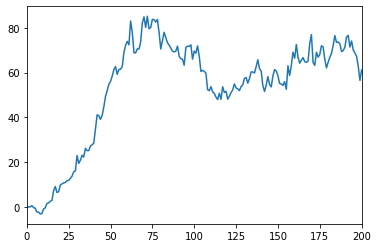

In [30]:
df_M['Cum Return %'].plot()

In [35]:
df_M.to_csv('Monthly_valuew.csv')